# Criação do Modelo

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [24]:
df2 = pd.read_csv('./data/gold/final_data.csv') # Padrão
df3 = pd.read_csv('./data/gold/final_data_normalized.csv') # normalizado
df3.head(5)

,id_escola,id_estudante,score_exame_norm,gen_estud,Ver_padro,faixa_pont_adm_bottom 25%,faixa_pont_adm_mid 50%,faixa_pont_adm_top 25%,rv_adm_escola_bottom 25%,rv_adm_escola_mid 50%,rv_adm_escola_top 25%,media_adm_escola,tipo_escola,schgend_boys,schgend_girls,schgend_mixed
0,1,1,0.705420,0,0.625000,1,0,0,0,1,0,0.661685,0,0,0,1
1,1,4,0.424290,0,0.319444,0,1,0,0,1,0,0.661685,0,0,0,1
2,1,6,0.317881,1,0.333333,0,1,0,0,1,0,0.661685,0,0,0,1
3,1,7,0.424290,1,0.097222,0,0,1,0,1,0,0.661685,0,0,0,1
4,1,13,0.473047,1,0.444444,0,1,0,0,1,0,0.661685,0,0,0,1


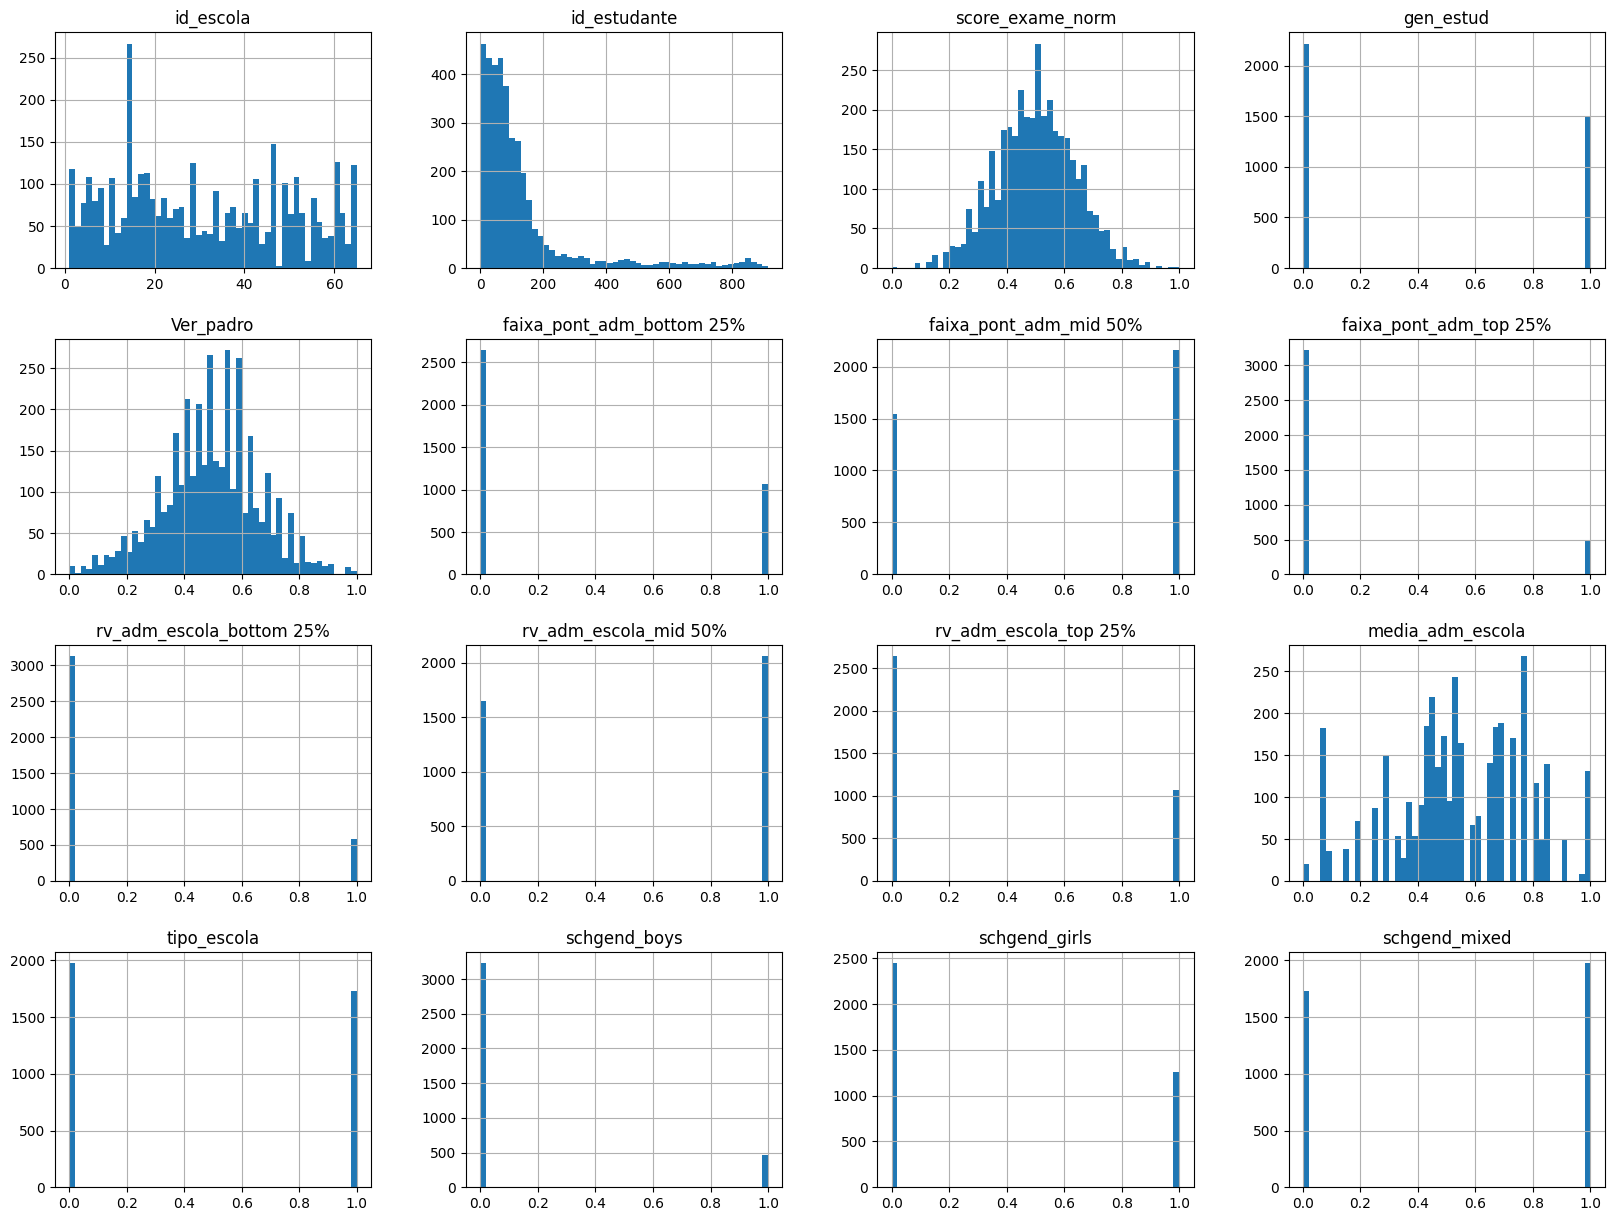

In [25]:
df3.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
# Selecione as colunas para X e y
# X = df[['Ver_padro','gen_estud','media_adm_escola','schgend_boys','schgend_girls','schgend_mixed','tipo_escola']]
X = df3.drop(columns=['score_exame_norm','id_escola','id_estudante'])
y = df3['score_exame_norm']
X, y = shuffle(X, y, random_state=24) # Embaralhar os dados
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=24)

# Treinar o modelo de Rede Neural
model_nn = MLPRegressor(hidden_layer_sizes=(3707, 16,16), max_iter=100, random_state=24)

# Treinamento do modelo
model_nn.fit(X_train, y_train)

# Previsões
y_pred_nn = model_nn.predict(X_test)

# Avaliação do modelo
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

# Resultados
print(f"RMSE (Rede Neural): {rmse_nn}")
print(f"R² (Rede Neural): {r2_nn}")

RMSE (Rede Neural): 0.10587391726091265
R² (Rede Neural): 0.42070260438123475


d:\Desktop\Projetos\SelfWork\JoinUs\Akyla_Aquino_Desafio\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
y_pred_nn.size

557

In [28]:
# Selecionar a primeira linha do DataFrame para prever
teste = df3.iloc[600, :].drop(['score_exame_norm', 'id_escola', 'id_estudante'])

# Reshape necessário para manter a estrutura de dados (matriz 2D) para o modelo
teste = teste.values.reshape(1, -1)  # Converte a série em uma matriz 2D (1, n_features)

# Fazer a previsão usando o modelo
y_pred = model_nn.predict(teste)

# Exibir o valor da previsão
print(f'Previsão: {y_pred}')


Previsão: [0.50881473]


d:\Desktop\Projetos\SelfWork\JoinUs\Akyla_Aquino_Desafio\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [29]:
df3.iloc[600, :].drop([ 'id_escola', 'id_estudante'])


score_exame_norm             0.482393
gen_estud                    0.000000
Ver_padro                    0.500000
faixa_pont_adm_bottom 25%    0.000000
faixa_pont_adm_mid 50%       1.000000
faixa_pont_adm_top 25%       0.000000
rv_adm_escola_bottom 25%     0.000000
rv_adm_escola_mid 50%        1.000000
rv_adm_escola_top 25%        0.000000
media_adm_escola             0.678259
tipo_escola                  0.000000
schgend_boys                 0.000000
schgend_girls                0.000000
schgend_mixed                1.000000
Name: 600, dtype: float64

In [30]:
# Adicionar a coluna de previsões no conjunto de teste
X_test['Score_modelo'] = y_pred_nn
X_test['Score_atual'] = y_test

# Calcular a média dos resultados por tipo de escola
result_by_school_type = X_test.groupby(['schgend_mixed', 'schgend_boys', 'schgend_girls'])[['Score_modelo', 'Score_atual']].mean()

# Exibir os resultados
print(result_by_school_type)


                                          Score_modelo  Score_atual
schgend_mixed schgend_boys schgend_girls                           
0             0            1                  0.527052     0.516937
              1            0                  0.502835     0.502276
1             0            0                  0.493293     0.488896


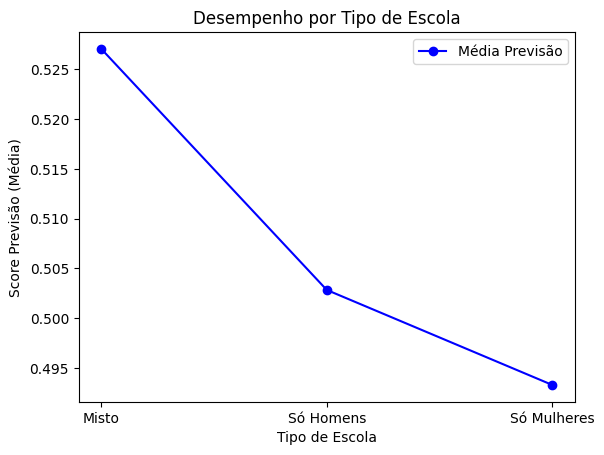

In [ ]:


# Criar rótulos para os tipos de escola
school_types = ['Misto', 'Só Homens', 'Só Mulheres']

# Obter a média das previsões para cada tipo de escola
predicted_scores = result_by_school_type['Score_modelo'].values

# Criar o gráfico de linha
plt.plot(school_types, predicted_scores, marker='o', linestyle='-', color=['blue','red','yellow'], label='Média Previsão')

# Adicionar título e rótulos
plt.title('Desempenho por Tipo de Escola')
plt.ylabel('Score Previsão (Média)')
plt.xlabel('Tipo de Escola')

# Adicionar legendas
plt.legend()

# Mostrar o gráfico
plt.show()
